# Práctica 2: Preprocesamiento
## Tratamiento Inteligente de Datos

Autor: Pedro Manuel Flores Crespo



Primero unas importaciones básicas

In [1]:
import pandas as pd 
from sklearn import tree
import numpy as np

seed = 77

In [2]:
pip install odfpy

     |████████████████████████████████| 727kB 12.3MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=67566fbc8cbebd43aeec31c6fce235603edbc6c8d3fedca20b9da65155016d78
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy


Cargamos el conjunto de datos (debemos añadirlo al especio de trabajo en un formato csv) y mostramos las cinco primeras instancias

In [3]:
autos = pd.read_csv("accidentes.csv")
autos.head()

,MONTH,WEEKDAY,WKDY_I,HOUR,HOUR_I,VEH_INVL,NON_INVL,LAND_USE,MAN_COL,MANCOL_I,INT_HWY,REL_JCT,RELJCT_I,REL_RWY,TRAF_WAY,NUM_LAN,ALIGN,ALIGN_I,PROFILE,PROFIL_I,SUR_COND,SURCON_I,TRAF_CON,TRFCON_I,SPD_LIM,SPDLIM_H,LGHT_CON,LGTCON_I,WEATHER,WEATHR_I,SCHL_BUS,PED_ACC,ALCOHOL,ALCHL_I,REGION,WRK_ZONE,FATALITIES,INJURY_CRASH,PRPTYDMG_CRASH
0,1,5,5,22,22,1,0,1,0,0,0,0,0,1,9,9,1,1,2,2,1,1,0,0,99,30,2,2,1,1,0,0,2,2,1,0,0,0,1
1,1,7,7,14,14,2,0,1,2,2,0,0,0,1,9,9,1,1,1,1,1,1,0,0,99,55,1,1,1,1,0,0,2,2,1,0,0,1,0
2,1,3,3,8,8,2,0,3,1,1,0,0,0,1,9,9,2,2,1,1,4,4,0,0,99,25,1,1,1,1,0,0,2,2,1,0,0,0,1
3,1,3,3,15,15,2,0,3,4,4,0,2,2,1,9,9,1,1,1,1,1,1,0,0,99,45,1,1,1,1,0,0,2,2,1,0,0,1,0
4,1,5,5,7,7,1,1,1,0,0,0,0,0,1,9,9,1,1,1,1,1,1,0,0,99,35,1,1,1,1,0,531,2,2,1,0,0,1,0


### Creamos la variable clase
Lo hacemos mediante la fórmula 
$$ clase = 3*FATALITIES + 2*INJUTY\_CRASH + PRPTYDMG\_CRASH'$$

De este modo, $clase \in \{1,2,3\} $ según el tipo de accidente que haya sido. También eliminamos las columnas con las que las hemos construido porque queremos predecir la clase en base a las otras.

In [4]:
autos['clase'] = 3*autos['FATALITIES'] + 2*autos['INJURY_CRASH'] + autos['PRPTYDMG_CRASH']
autos = autos.drop(columns=['FATALITIES', 'INJURY_CRASH','PRPTYDMG_CRASH'])
autos.head()

,MONTH,WEEKDAY,WKDY_I,HOUR,HOUR_I,VEH_INVL,NON_INVL,LAND_USE,MAN_COL,MANCOL_I,INT_HWY,REL_JCT,RELJCT_I,REL_RWY,TRAF_WAY,NUM_LAN,ALIGN,ALIGN_I,PROFILE,PROFIL_I,SUR_COND,SURCON_I,TRAF_CON,TRFCON_I,SPD_LIM,SPDLIM_H,LGHT_CON,LGTCON_I,WEATHER,WEATHR_I,SCHL_BUS,PED_ACC,ALCOHOL,ALCHL_I,REGION,WRK_ZONE,clase
0,1,5,5,22,22,1,0,1,0,0,0,0,0,1,9,9,1,1,2,2,1,1,0,0,99,30,2,2,1,1,0,0,2,2,1,0,1
1,1,7,7,14,14,2,0,1,2,2,0,0,0,1,9,9,1,1,1,1,1,1,0,0,99,55,1,1,1,1,0,0,2,2,1,0,2
2,1,3,3,8,8,2,0,3,1,1,0,0,0,1,9,9,2,2,1,1,4,4,0,0,99,25,1,1,1,1,0,0,2,2,1,0,1
3,1,3,3,15,15,2,0,3,4,4,0,2,2,1,9,9,1,1,1,1,1,1,0,0,99,45,1,1,1,1,0,0,2,2,1,0,2
4,1,5,5,7,7,1,1,1,0,0,0,0,0,1,9,9,1,1,1,1,1,1,0,0,99,35,1,1,1,1,0,531,2,2,1,0,2


In [5]:
autos.dtypes

MONTH       int64
WEEKDAY     int64
WKDY_I      int64
HOUR        int64
HOUR_I      int64
VEH_INVL    int64
NON_INVL    int64
LAND_USE    int64
MAN_COL     int64
MANCOL_I    int64
INT_HWY     int64
REL_JCT     int64
RELJCT_I    int64
REL_RWY     int64
TRAF_WAY    int64
NUM_LAN     int64
ALIGN       int64
ALIGN_I     int64
PROFILE     int64
PROFIL_I    int64
SUR_COND    int64
SURCON_I    int64
TRAF_CON    int64
TRFCON_I    int64
SPD_LIM     int64
SPDLIM_H    int64
LGHT_CON    int64
LGTCON_I    int64
WEATHER     int64
WEATHR_I    int64
SCHL_BUS    int64
PED_ACC     int64
ALCOHOL     int64
ALCHL_I     int64
REGION      int64
WRK_ZONE    int64
clase       int64
dtype: object

Obtenemos los conjuntos con valores pre-inputados y sin imputar

In [6]:

autos_NI = autos.drop(columns=['WKDY_I',  'HOUR_I', 'MANCOL_I', 'RELJCT_I', 'ALIGN_I', 'PROFIL_I', 'SURCON_I', 'TRFCON_I', 'SPDLIM_H', 'LGTCON_I', 'WEATHR_I', 'ALCHL_I'])
autos_I  = autos.drop(columns=['WEEKDAY', 'HOUR',    'MAN_COL', 'REL_JCT',  'ALIGN',   'PROFILE', 'SUR_COND',  'TRAF_CON', 'SPD_LIM',  'LGHT_CON', 'WEATHER',  'ALCOHOL'])
#print( str(len(autos_I.columns)) + " " + str(len(autos_NI.columns)) )


Definimos algunas funciones que nos van a hacer más fácil aplicar el algoritmo a los diferentes preprocesamientos

In [7]:
'''
Función para obtener la exactitud tras haber realizados la clasifiación
'''
def exactitud(predictions, labels):
  igualdad = predictions == labels
  igualdad.value_counts()
  verdaderos = igualdad[ igualdad== True  ] 
  falsos = igualdad[ igualdad== False  ] 
  # print( "Tamaños de los conjuntos de datos: " + str(len(verdaderos))+ "/" + str(len(falsos)) + "/" + str(len(igualdad)) )
  print("Bien clasificados: " + str(len(verdaderos)) + " de " + str(len(igualdad)) +'\n' +
        "Exactitud:" + str( round(len(verdaderos)/len(igualdad)*100, 2) ))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

test = 0.2
'''
Separamos las columnas para predecir de la columna 'clase'
'''
def splitClase(df):
  datos = df.iloc[:, :-1]
  labels = df['clase']
  return datos, labels
'''
Crea el árbol de decisión y devuelve la exactitud y la matriz de confusión
'''

def arbol(df):
  datos, labels = splitClase(df)
  datos_train, datos_test, labels_train, labels_test = train_test_split( datos, labels, test_size=test, random_state=seed)

  tree_var = tree.DecisionTreeClassifier(random_state=seed)
  tree_var = tree_var.fit(datos_train, labels_train)
  predictions = tree_var.predict(datos_test)

  exactitud(predictions, labels_test)
  print("      ")
  print(metrics.confusion_matrix(labels_test, predictions, labels=[1, 2, 3]))
  print(metrics.classification_report(labels_test, predictions, labels=[1, 2, 3]))

def arbol_dl(datos, labels):
  datos_train, datos_test, labels_train, labels_test = train_test_split( datos, labels, test_size=test, random_state=seed)

  tree_var = tree.DecisionTreeClassifier(random_state=seed)
  tree_var = tree_var.fit(datos_train, labels_train)
  predictions = tree_var.predict(datos_test)

  exactitud(predictions, labels_test)
  print("      ")
  print(metrics.confusion_matrix(labels_test, predictions, labels=[1, 2, 3]))
  print(metrics.classification_report(labels_test, predictions, labels=[1, 2, 3]))

### Aplicamos el árbol de decisión a los conjuntos sin procesar



In [9]:
arbol(autos_NI)

Bien clasificados: 6206 de 11193
Exactitud:55.45
      
[[3231 2424   49]
 [2344 2969   68]
 [  45   57    6]]
              precision    recall  f1-score   support

           1       0.57      0.57      0.57      5704
           2       0.54      0.55      0.55      5381
           3       0.05      0.06      0.05       108

    accuracy                           0.55     11193
   macro avg       0.39      0.39      0.39     11193
weighted avg       0.56      0.55      0.55     11193



### Aplicamos el árbol de decisión a los datos preinputados

In [10]:
arbol(autos_I)

Bien clasificados: 6201 de 11193
Exactitud:55.4
      
[[3264 2384   56]
 [2371 2931   79]
 [  38   64    6]]
              precision    recall  f1-score   support

           1       0.58      0.57      0.57      5704
           2       0.54      0.54      0.54      5381
           3       0.04      0.06      0.05       108

    accuracy                           0.55     11193
   macro avg       0.39      0.39      0.39     11193
weighted avg       0.56      0.55      0.55     11193



### Discretización
Para poder llevar a cabo la discretización, necesitamos separar las variables a predecir de las etiquetas

Lo que vamos a hacer es una discretización en base a si los accidentes ocurrieron en hoa punta o no

In [11]:
autos_DISC = autos_I.copy()
autos_DISC['HOUR_I']=pd.cut(x=autos_DISC['HOUR_I'], bins=[-1,12,17,24], labels=[1,2,3])
autos_DISC['SPDLIM_H'] = pd.cut(x=autos_DISC['SPDLIM_H'], bins=[-1,30,50,80], labels=[1,2,3])
autos_DISC['WKDY_I'] = pd.cut(x=autos_DISC['WKDY_I'], bins=[0,1,6,7], labels=[1,2,3])
autos_DISC.head()

,MONTH,WKDY_I,HOUR_I,VEH_INVL,NON_INVL,LAND_USE,MANCOL_I,INT_HWY,RELJCT_I,REL_RWY,TRAF_WAY,NUM_LAN,ALIGN_I,PROFIL_I,SURCON_I,TRFCON_I,SPDLIM_H,LGTCON_I,WEATHR_I,SCHL_BUS,PED_ACC,ALCHL_I,REGION,WRK_ZONE,clase
0,1,2,3,1,0,1,0,0,0,1,9,9,1,2,1,0,1,2,1,0,0,2,1,0,1
1,1,3,2,2,0,1,2,0,0,1,9,9,1,1,1,0,3,1,1,0,0,2,1,0,2
2,1,2,1,2,0,3,1,0,0,1,9,9,2,1,4,0,1,1,1,0,0,2,1,0,1
3,1,2,2,2,0,3,4,0,2,1,9,9,1,1,1,0,2,1,1,0,0,2,1,0,2
4,1,2,1,1,1,1,0,0,0,1,9,9,1,1,1,0,2,1,1,0,531,2,1,0,2


In [12]:
arbol(autos_DISC)

Bien clasificados: 6187 de 11193
Exactitud:55.28
      
[[3296 2359   49]
 [2426 2879   76]
 [  38   58   12]]
              precision    recall  f1-score   support

           1       0.57      0.58      0.58      5704
           2       0.54      0.54      0.54      5381
           3       0.09      0.11      0.10       108

    accuracy                           0.55     11193
   macro avg       0.40      0.41      0.40     11193
weighted avg       0.55      0.55      0.55     11193



### Trabajamos con los valores perdidos

Sustituimos los valores que indican un valor desconocido po un NaN para que sea más fácil tratarlo por las librerías. Luego, vemos también cuáles son las columnas con mayor número de números perdidos

In [13]:
autos_NA = autos_NI.copy()
#'WEEKDAY', 'HOUR',    'MAN_COL', 'REL_JCT',  'ALIGN',   'PROFILE', 'SUR_COND',  'TRAF_CON', 'SPD_LIM',  'LGHT_CON', 'WEATHER',  'ALCOHOL'
autos_NA['WEEKDAY'] = autos_NA['WEEKDAY'].replace(9, np.nan)
autos_NA['HOUR'] = autos_NA['HOUR'].replace(99, np.nan)
autos_NA['MAN_COL'] = autos_NA['MAN_COL'].replace(99, np.nan)
autos_NA['REL_JCT'] = autos_NA['REL_JCT'].replace(99, np.nan)
autos_NA['ALIGN'] = autos_NA['ALIGN'].replace(9, np.nan)
autos_NA['PROFILE'] = autos_NA['PROFILE'].replace(9, np.nan)
autos_NA['SUR_COND'] = autos_NA['SUR_COND'].replace(9, np.nan)
autos_NA['TRAF_CON'] = autos_NA['TRAF_CON'].replace(99, np.nan)
autos_NA['SPD_LIM'] = autos_NA['SPD_LIM'].replace(99, np.nan)
autos_NA['LGHT_CON'] = autos_NA['LGHT_CON'].replace(9, np.nan)
autos_NA['WEATHER'] = autos_NA['WEATHER'].replace(9, np.nan)
autos_NA['ALCOHOL'] = autos_NA['ALCOHOL'].replace(9, np.nan)
autos_NA.isna().sum()

MONTH           0
WEEKDAY         0
HOUR          267
VEH_INVL        0
NON_INVL        0
LAND_USE        0
MAN_COL         0
INT_HWY         0
REL_JCT        61
REL_RWY         0
TRAF_WAY        0
NUM_LAN         0
ALIGN        7433
PROFILE     16125
SUR_COND      682
TRAF_CON     1345
SPD_LIM      8798
LGHT_CON      546
WEATHER       718
SCHL_BUS        0
PED_ACC         0
ALCOHOL      2719
REGION          0
WRK_ZONE        0
clase           0
dtype: int64

### Eliminamos las FILAS que tiene valores perdidos
Efectivamente, comprbamos que no tienen NaNs

In [14]:
autos_Not_NA = autos.dropna()
autos_Not_NA.isna().sum()

MONTH       0
WEEKDAY     0
WKDY_I      0
HOUR        0
HOUR_I      0
VEH_INVL    0
NON_INVL    0
LAND_USE    0
MAN_COL     0
MANCOL_I    0
INT_HWY     0
REL_JCT     0
RELJCT_I    0
REL_RWY     0
TRAF_WAY    0
NUM_LAN     0
ALIGN       0
ALIGN_I     0
PROFILE     0
PROFIL_I    0
SUR_COND    0
SURCON_I    0
TRAF_CON    0
TRFCON_I    0
SPD_LIM     0
SPDLIM_H    0
LGHT_CON    0
LGTCON_I    0
WEATHER     0
WEATHR_I    0
SCHL_BUS    0
PED_ACC     0
ALCOHOL     0
ALCHL_I     0
REGION      0
WRK_ZONE    0
clase       0
dtype: int64

In [15]:
arbol(autos_Not_NA)

Bien clasificados: 6254 de 11193
Exactitud:55.87
      
[[3291 2378   35]
 [2337 2956   88]
 [  37   64    7]]
              precision    recall  f1-score   support

           1       0.58      0.58      0.58      5704
           2       0.55      0.55      0.55      5381
           3       0.05      0.06      0.06       108

    accuracy                           0.56     11193
   macro avg       0.39      0.40      0.40     11193
weighted avg       0.56      0.56      0.56     11193



### Eliminar columnas con algún NA
Eliminamos las columnas o características que tienen algún valor perdido. 

In [16]:
autos_Not_NA_col = autos_NA.dropna(how='any', axis=1)
autos_Not_NA_col.isna().sum()

MONTH       0
WEEKDAY     0
VEH_INVL    0
NON_INVL    0
LAND_USE    0
MAN_COL     0
INT_HWY     0
REL_RWY     0
TRAF_WAY    0
NUM_LAN     0
SCHL_BUS    0
PED_ACC     0
REGION      0
WRK_ZONE    0
clase       0
dtype: int64

In [17]:
arbol(autos_Not_NA_col)

Bien clasificados: 6135 de 11193
Exactitud:54.81
      
[[3519 2157   28]
 [2719 2611   51]
 [  38   65    5]]
              precision    recall  f1-score   support

           1       0.56      0.62      0.59      5704
           2       0.54      0.49      0.51      5381
           3       0.06      0.05      0.05       108

    accuracy                           0.55     11193
   macro avg       0.39      0.38      0.38     11193
weighted avg       0.55      0.55      0.55     11193



### Rellenamos con la media o moda

In [18]:
autos_MEAN = autos_NA.copy()
autos_MEAN['HOUR'] = autos_MEAN['HOUR'].fillna(autos_MEAN['HOUR'].mean())
autos_MEAN['SPD_LIM'] = autos_MEAN['SPD_LIM'].fillna(autos_MEAN['SPD_LIM'].mean())
mode = autos_MEAN['ALCOHOL'].mode()[0]
autos_MEAN['ALCOHOL'] = autos_MEAN['ALCOHOL'].fillna(mode)
mode = autos_MEAN['WEATHER'].mode()[0]
autos_MEAN['WEATHER'] = autos_MEAN['WEATHER'].fillna(mode)
mode = autos_MEAN['REL_JCT'].mode()[0]
autos_MEAN['REL_JCT'] = autos_MEAN['REL_JCT'].fillna(mode)
mode = autos_MEAN['ALIGN'].mode()[0]
autos_MEAN['ALIGN'] = autos_MEAN['ALIGN'].fillna(mode)
mode = autos_MEAN['PROFILE'].mode()[0]
autos_MEAN['PROFILE'] = autos_MEAN['PROFILE'].fillna(mode)
mode = autos_MEAN['SUR_COND'].mode()[0]
autos_MEAN['SUR_COND'] = autos_MEAN['SUR_COND'].fillna(mode)
mode = autos_MEAN['TRAF_CON'].mode()[0]
autos_MEAN['TRAF_CON'] = autos_MEAN['TRAF_CON'].fillna(mode)
mode = autos_MEAN['LGHT_CON'].mode()[0]
autos_MEAN['LGHT_CON'] = autos_MEAN['LGHT_CON'].fillna(mode)

autos_MEAN.isna().sum()

MONTH       0
WEEKDAY     0
HOUR        0
VEH_INVL    0
NON_INVL    0
LAND_USE    0
MAN_COL     0
INT_HWY     0
REL_JCT     0
REL_RWY     0
TRAF_WAY    0
NUM_LAN     0
ALIGN       0
PROFILE     0
SUR_COND    0
TRAF_CON    0
SPD_LIM     0
LGHT_CON    0
WEATHER     0
SCHL_BUS    0
PED_ACC     0
ALCOHOL     0
REGION      0
WRK_ZONE    0
clase       0
dtype: int64

In [19]:
arbol(autos_MEAN)

Bien clasificados: 6166 de 11193
Exactitud:55.09
      
[[3227 2441   36]
 [2382 2934   65]
 [  48   55    5]]
              precision    recall  f1-score   support

           1       0.57      0.57      0.57      5704
           2       0.54      0.55      0.54      5381
           3       0.05      0.05      0.05       108

    accuracy                           0.55     11193
   macro avg       0.39      0.39      0.39     11193
weighted avg       0.55      0.55      0.55     11193



### PCA
Vamos a realizar un análisis de componente principales para reducir el número de características.
Para ello, vamos a usar el conjunto con los datos discretizados

In [20]:
from sklearn.decomposition import PCA

In [21]:
autos_PCA = autos_DISC.copy()
labels = autos_PCA['clase']
autos_PCA.drop(columns=['clase'])

,MONTH,WKDY_I,HOUR_I,VEH_INVL,NON_INVL,LAND_USE,MANCOL_I,INT_HWY,RELJCT_I,REL_RWY,TRAF_WAY,NUM_LAN,ALIGN_I,PROFIL_I,SURCON_I,TRFCON_I,SPDLIM_H,LGTCON_I,WEATHR_I,SCHL_BUS,PED_ACC,ALCHL_I,REGION,WRK_ZONE
0,1,2,3,1,0,1,0,0,0,1,9,9,1,2,1,0,1,2,1,0,0,2,1,0
1,1,3,2,2,0,1,2,0,0,1,9,9,1,1,1,0,3,1,1,0,0,2,1,0
2,1,2,1,2,0,3,1,0,0,1,9,9,2,1,4,0,1,1,1,0,0,2,1,0
3,1,2,2,2,0,3,4,0,2,1,9,9,1,1,1,0,2,1,1,0,0,2,1,0
4,1,2,1,1,1,1,0,0,0,1,9,9,1,1,1,0,2,1,1,0,531,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55959,12,3,1,2,0,3,4,0,3,1,1,2,1,1,1,0,1,1,1,0,0,1,2,0
55960,12,2,2,2,0,3,4,0,1,1,1,4,1,1,4,0,2,1,1,0,0,2,2,0
55961,12,2,1,3,0,2,1,0,2,1,1,5,1,1,1,1,2,1,1,0,0,2,2,0
55962,12,2,2,3,0,2,1,0,1,1,1,5,1,2,2,0,2,1,4,0,0,2,2,0


Vamos a reducir el conjunto a un total de 7 características

In [22]:
pca = PCA(n_components=7)
pca.fit(autos_PCA)
autos_PCA = pca.transform(autos_PCA)
arbol_dl(autos_PCA, labels)

Bien clasificados: 7215 de 11193
Exactitud:64.46
      
[[3787 1900   17]
 [1901 3422   58]
 [  24   78    6]]
              precision    recall  f1-score   support

           1       0.66      0.66      0.66      5704
           2       0.63      0.64      0.63      5381
           3       0.07      0.06      0.06       108

    accuracy                           0.64     11193
   macro avg       0.46      0.45      0.45     11193
weighted avg       0.64      0.64      0.64     11193



### Balanceamos

Como vemos, hay un número mucho menos frecuente de tipo 3

In [23]:
autos['clase'].value_counts()

1    28536
2    26897
3      531
Name: clase, dtype: int64

In [24]:
autos_1_3 = autos_DISC.copy()
autos_1_3['clase']=pd.cut(x=autos_1_3['clase'], bins=[0,2,4], labels=[1,3])
autos_1_3['clase'].value_counts()

1    55433
3      531
Name: clase, dtype: int64

In [25]:
arbol(autos_1_3)

Bien clasificados: 10954 de 11193
Exactitud:97.86
      
[[10942     0   143]
 [    0     0     0]
 [   96     0    12]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     11085
           2       0.00      0.00      0.00         0
           3       0.08      0.11      0.09       108

   micro avg       0.98      0.98      0.98     11193
   macro avg       0.36      0.37      0.36     11193
weighted avg       0.98      0.98      0.98     11193



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
data = autos_DISC.copy()
autos_1 = data[ data['clase'] == 1]
autos_2 = data[ data['clase'] == 2]
autos_3 = data[ data['clase'] == 3]

In [27]:
from random import shuffle

autos_1 = autos_1.sample(frac = 1)[:int(len(autos_3)/2)]
autos_2 = autos_2.sample(frac = 1)[:int(len(autos_3)/2)]
autos_BALANCED = pd.concat([autos_1, autos_2, autos_3])
#autos_BALANCED = autos_BALANCED.sample(frac = 1)
autos_BALANCED.head()

,MONTH,WKDY_I,HOUR_I,VEH_INVL,NON_INVL,LAND_USE,MANCOL_I,INT_HWY,RELJCT_I,REL_RWY,TRAF_WAY,NUM_LAN,ALIGN_I,PROFIL_I,SURCON_I,TRFCON_I,SPDLIM_H,LGTCON_I,WEATHR_I,SCHL_BUS,PED_ACC,ALCHL_I,REGION,WRK_ZONE,clase
28384,9,2,1,2,0,8,4,0,1,1,1,3,1,1,1,1,2,1,1,0,0,2,3,0,1
28977,4,2,2,2,0,2,4,0,3,1,1,7,1,1,1,0,2,1,1,0,0,2,3,0,1
22084,2,2,1,2,0,8,4,0,1,1,1,5,1,1,2,1,2,1,2,0,0,2,3,0,1
49574,2,2,1,2,0,8,4,0,1,1,1,3,1,3,1,1,2,1,1,0,0,2,3,0,1
20397,8,2,1,2,0,2,5,0,0,1,1,4,1,1,1,0,2,1,1,0,0,2,2,0,1


In [28]:
autos_BALANCED['clase'].value_counts()

3    531
2    265
1    265
Name: clase, dtype: int64

In [29]:
autos_BALANCED['clase']=pd.cut(x=autos_BALANCED['clase'], bins=[0,2,4], labels=[1,3])
autos_BALANCED['clase'].value_counts()

3    531
1    530
Name: clase, dtype: int64

In [30]:
arbol(autos_BALANCED)

Bien clasificados: 133 de 213
Exactitud:62.44
      
[[70  0 36]
 [ 0  0  0]
 [44  0 63]]
              precision    recall  f1-score   support

           1       0.61      0.66      0.64       106
           2       0.00      0.00      0.00         0
           3       0.64      0.59      0.61       107

   micro avg       0.62      0.62      0.62       213
   macro avg       0.42      0.42      0.42       213
weighted avg       0.63      0.62      0.62       213



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusiones

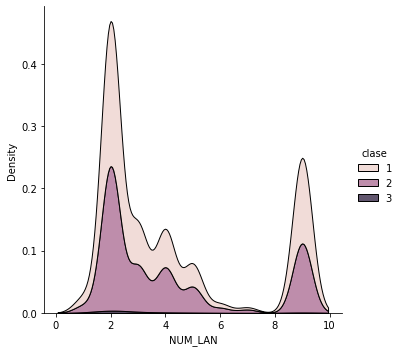

In [36]:
import seaborn as sns

sns.displot(autos, x="NUM_LAN", hue="clase", kind="kde", multiple="stack", fill=True)

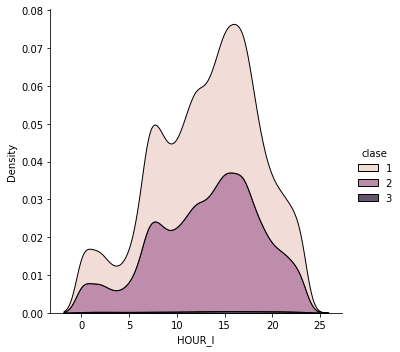

In [32]:
sns.displot(autos, x="HOUR_I", hue="clase", kind="kde", multiple="stack", fill=True)

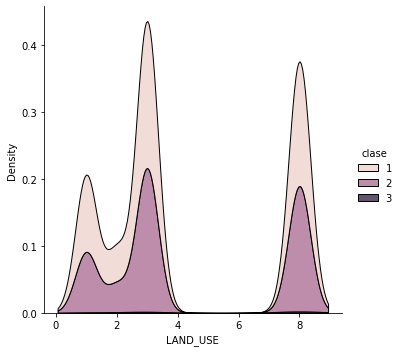

In [33]:
sns.displot(autos, x="LAND_USE", hue="clase", kind="kde", multiple="stack", fill=True)

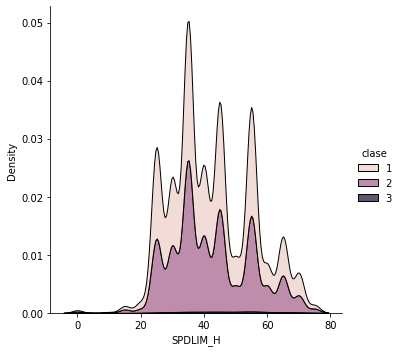

In [34]:
sns.displot(autos, x="SPDLIM_H", hue="clase", kind="kde", multiple="stack", fill=True)